## Titanic: Machine Learning from Disaster
This notebook will record the precesses of the data for the competition, refer to [this](https://www.kaggle.com/ymlai87416/titanic-score-over-80-part-1-data-preparation).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def combine_train_test(train_raw, test_raw):
    # there isn't 'Survived' column in train_ds, because it's label
    train_ds = train_raw[["Pclass", "Name", "Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]]
    full_ds = pd.concat([train_ds, test_raw])
    return full_ds

def get_train_ds(full_ds, train_raw):
    return full_ds[full_ds.index.isin(train_raw.index)]

def get_test_ds(full_ds, test_raw):
    return full_ds[full_ds.index.isin(test_raw.index)]

In [51]:
train_path = '/Users/Bin/Downloads/datasets/Titanic, Machine Learning from Disaster/train.csv'
test_path = '/Users/Bin/Downloads/datasets/Titanic, Machine Learning from Disaster/test.csv'
sumission_path = '/Users/Bin/Downloads/datasets/Titanic, Machine Learning from Disaster/submission.csv'

In [4]:
# load data
train_raw = pd.read_csv(train_path, sep=',', index_col=0)
test_raw = pd.read_csv(test_path, sep=',', index_col=0)

full_ds = combine_train_test(train_raw, test_raw)
train_label = train_raw['Survived']

Let's have a quick look at the first and last rows.

In [6]:
# check the column names
full_ds.columns

Index([u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket',
       u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [7]:
full_ds.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
full_ds.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


We indeed see the following:
* variables with NaN representing missing values

In [10]:
print full_ds.shape
# remember to drop the duplicates
full_ds.drop_duplicates()
print full_ds.shape

print test_raw.shape

(1309, 10)
(1309, 10)
(418, 10)


We take a look at the number of rows and columns in the training data, and we have checked if there are dumplicates in the training data

In [11]:
full_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [12]:
full_ds.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

We can see that the number of `Age`, `Cabin` and `Embarked` is not 891, that's because there are some NaN there.

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


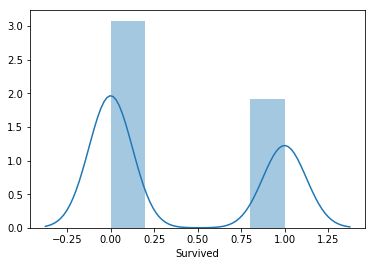

In [14]:
## describe the output field
# print(df['Survived'].describe())
# sns.distplot(df['Survived'])
print(train_label.describe())
sns.distplot(train_label)

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

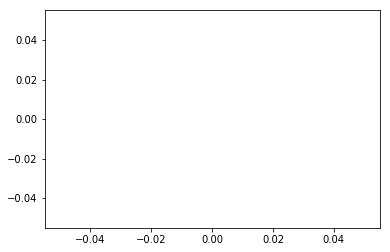

In [15]:
print(full_ds.Fare.describe())
sns.distplot(full_ds.Fare)
# we can check every attribute like this

In [12]:
# merge data into one dataset to prepare comparison the training and testing data
train_1 = df.copy()
train_1['Source'] = 'Train'
test_1 = test.copy()
test['Source'] = 'Test'
all_data = pd.concat([train_1, test_1])
print(all_data.shape)

(1309, 12)


In [13]:
# check all the data type
all_data.dtypes
# all_data.dtypes.value_counts()

Age         float64
Cabin        object
Embarked     object
Fare        float64
Name         object
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Source       object
Survived    float64
Ticket       object
dtype: object

In [14]:
# find all NULL from full dataset
print(all_data.isnull().sum())

# we can see the detailed rows in NULL attribute
# print(all_data[pd.isnull(all_data['Cabin'])][:10])
all_data[pd.isnull(all_data['Cabin'])][:10]
# all_data[all_data['Fare'].isnull()]

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Source       418
Survived     418
Ticket         0
dtype: int64


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Source,Survived,Ticket
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,Train,0.0,A/5 21171
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,Train,1.0,STON/O2. 3101282
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,Train,0.0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,Train,0.0,330877
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,Train,0.0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,Train,1.0,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,Train,1.0,237736
13,20.0,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,3,male,0,Train,0.0,A/5. 2151
14,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,3,male,1,Train,0.0,347082


### Inhancing dataset and visualizing data in statistics

In [15]:
# df.Fare.unique()
# df.Fare.describe()

In [16]:
# for attribute 'Name'
def convert_name_to_salutation(name):
    name_t = name.lower()
    salutations = ['mrs.', 'mr.', 'ms.', 'mlle.', 'miss.', 'sir.', 'rev.', 'mme.', 'master.', 'major.',
                  'lady.', 'jonkheer.', 'dr.', 'don.', 'col.', 'capt.', 'countess.']
    
    for sal in salutations:
        if sal in name_t:
            return sal
        
    return 'none'

# df.Cabin.unique()
def convert_cabin_to_area(cabin):
    areas = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
    cabin_t = str(cabin).upper().strip()
    
    for area in areas:
        if cabin_t.startswith(area):
            return area
    
    return 'none'

# df.Age.unique()
def discrete_age(age):
    if math.isnan(age):
        return 0
    
    for i in range(0, 101, 10):
        if (i > age):
            return i

# df.Fare.unique()
# df.Fare.describe()
def discrete_fare(fare):
    if math.isnan(fare):
        return 0
    
    for i in range(0, 601, 50):
        if i > fare:
            return i

def add_salutation_col(df):
    df['Salutation'] = df['Name'].map(lambda x: convert_name_to_salutation(x))

def add_cabin_area_col(df):
    df['CabinArea'] = df['Cabin'].map(lambda x: convert_cabin_to_area(x))
    
# add sibsp and parch together
def add_family_member_col(df):
    df['FamilyMember'] = df['SibSp'] + df['Parch']
    

#  process
add_salutation_col(full_ds)
add_cabin_area_col(full_ds)
add_family_member_col(full_ds)

# print(all_data[:10])
full_ds[0:10]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr.,none,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs.,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,none,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs.,C,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr.,none,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,mr.,none,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,mr.,E,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,master.,none,4
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,mrs.,none,2


### Impute the missing value
Convert the label to number, encoding.

In [17]:
from sklearn import preprocessing

salutation_enc = preprocessing.LabelEncoder()
salutation_enc.fit(full_ds['Salutation'])
full_ds['Salutation_enc'] = salutation_enc.transform(full_ds['Salutation'])

cabin_enc = preprocessing.LabelEncoder()
cabin_enc.fit(full_ds['CabinArea'])
full_ds['CabinArea_enc'] = cabin_enc.transform(full_ds['CabinArea'])

sex_enc = preprocessing.LabelEncoder()
sex_enc.fit(full_ds["Sex"])
full_ds["Sex_enc"] = sex_enc.transform(full_ds["Sex"])

full_ds[:10]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinArea,FamilyMember,Salutation_enc,CabinArea_enc,Sex_enc
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr.,none,1,12,8,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs.,C,1,13,2,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,none,0,9,8,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs.,C,1,13,2,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr.,none,0,12,8,1
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,mr.,none,0,12,8,1
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,mr.,E,0,12,4,1
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,master.,none,4,8,8,1
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,mrs.,none,2,13,8,0


In [18]:
# use mean to impute the missing data
# TODO
def impute_missing(data_1_group, target):
    imp = preprocessing.Imputer(missing_values='NaN', strategy='mean')
    imp.fit(data_1_group[target].values.reshape(-1, 1))
#     imp = imp.fit(data_1_group[target].values.reshape(-1, 1
    data_1_group[target] = imp.transform(data_1_group[target].values.reshape(-1, 1)).reshape((-1, 1))
    
    return data_1_group

def impute_by_group(dataset, groupby, target):
    result = pd.DataFrame(columns=dataset.columns)
    result.index.name = dataset.index.name
    for grp_name, data_1_group in dataset.groupby(groupby):
        imputed_group = impute_missing(data_1_group, target)
        result = pd.concat([result, imputed_group])
    result = result.convert_objects()
    return result

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


             Pclass                                            Name     Sex  \
PassengerId                                                                   
29                3                   O'Dwyer, Miss. Ellen "Nellie"  female   
33                3                        Glynn, Miss. Mary Agatha  female   
6                 3                                Moran, Mr. James    male   
18                2                    Williams, Mr. Charles Eugene    male   
27                3                         Emir, Mr. Farred Chehab    male   
30                3                             Todoroff, Mr. Lalio    male   
37                3                                Mamee, Mr. Hanna    male   
43                3                             Kraeff, Mr. Theodor    male   
20                3                         Masselmani, Mrs. Fatima  female   
32                1  Spencer, Mrs. William Augustus (Marie Eugenie)  female   

                   Age  SibSp  Parch    Ticket     

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


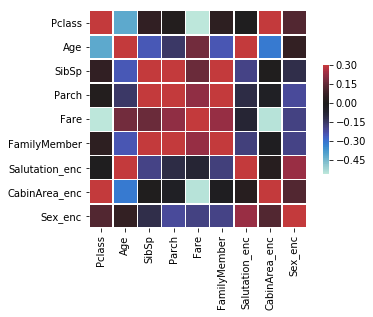

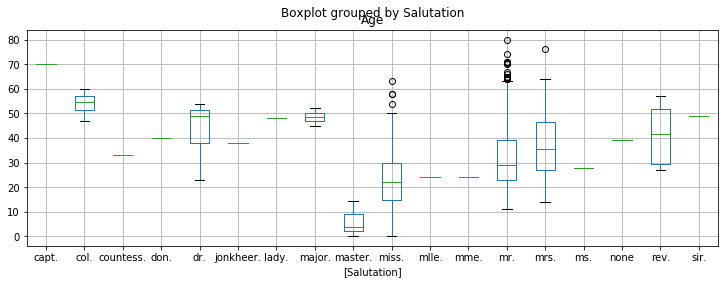

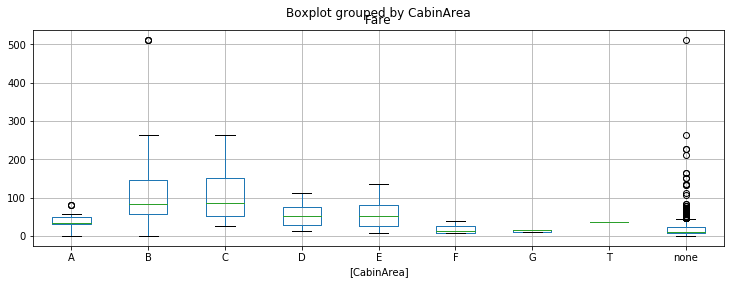

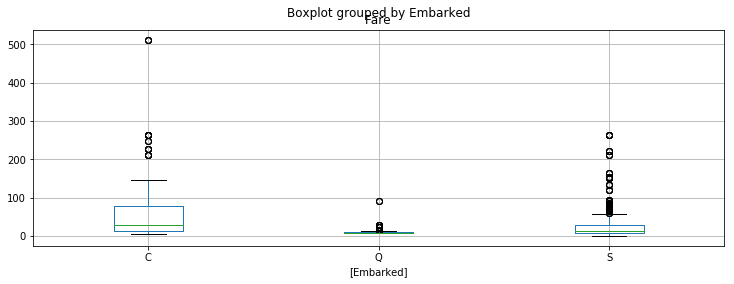

In [19]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(full_ds.corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Missing Age: the most correlated field is salutation.
full_ds[['Salutation', 'Age']].boxplot(by='Salutation', figsize=(12, 4))
full_ds = impute_by_group(full_ds, 'Salutation', 'Age')
print(full_ds[full_ds.index.isin([6,18,20,27,29,30,32,33,37,43])])

# Missing Fare: the most correlated field is Cabin
full_ds[['CabinArea', 'Fare']].boxplot(by='CabinArea', figsize=(12, 4))
full_ds = impute_by_group(full_ds, 'CabinArea', 'Fare')
print(full_ds[full_ds.index.isin([1044])])

# Missing Embark
full_ds[['Embarked', 'Fare']].boxplot(by='Embarked', figsize=(12, 4))
full_ds.set_value(62, 'Embarked', 'C')
full_ds.set_value(830, 'Embarked', 'C')
print(full_ds[full_ds.index.isin([62, 830])])

embarked_enc = preprocessing.LabelEncoder()
embarked_enc.fit(full_ds['Embarked'])
full_ds['Embarked_enc'] = embarked_enc.transform(full_ds['Embarked'])
# print(full_ds[full_ds.index.isin([62, 830])])

#### Visualize data and the corresponding labels

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,0.98,'CabinArea statistic')

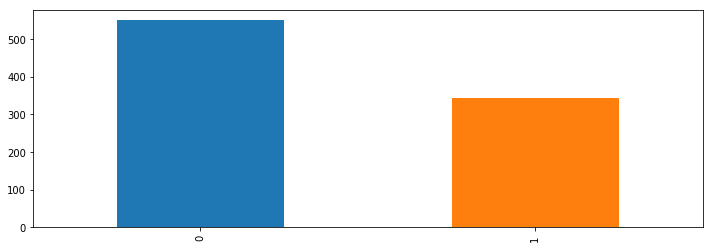

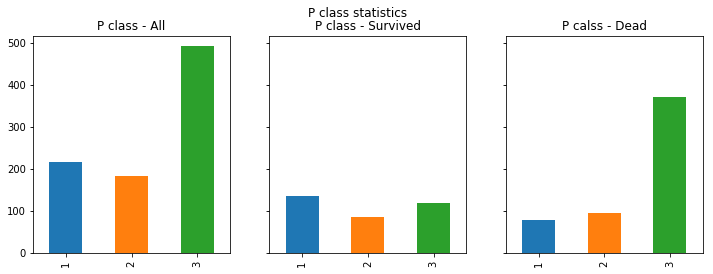

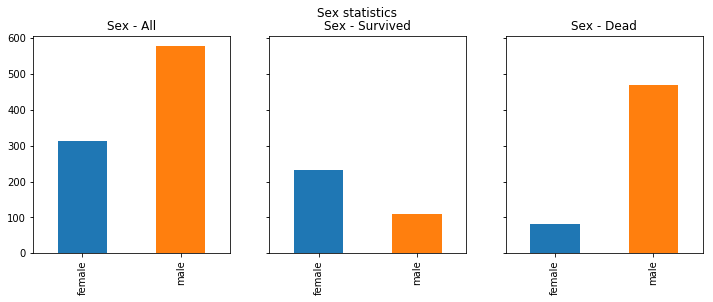

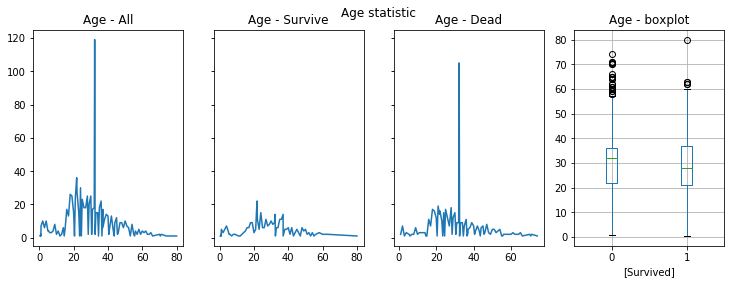

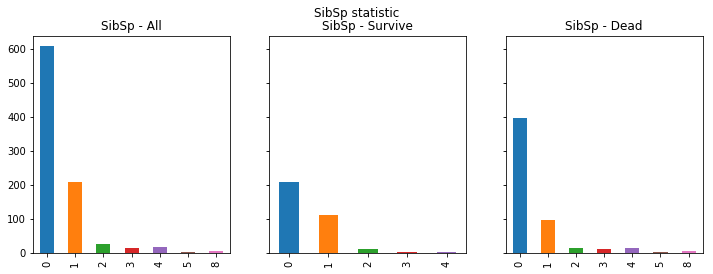

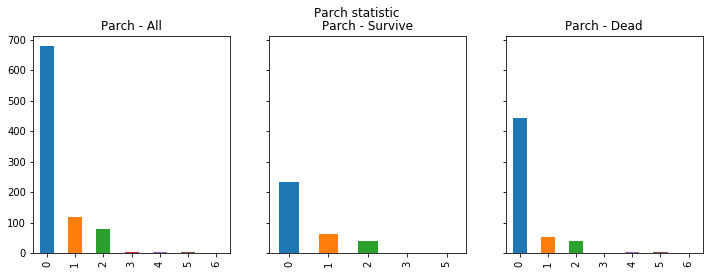

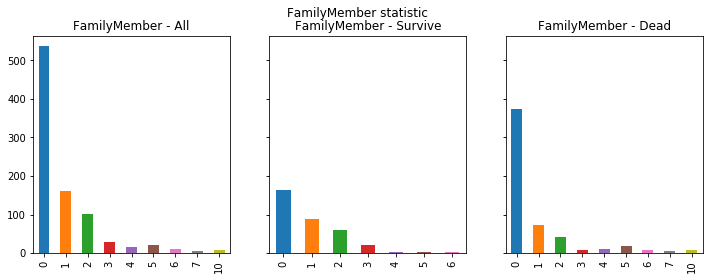

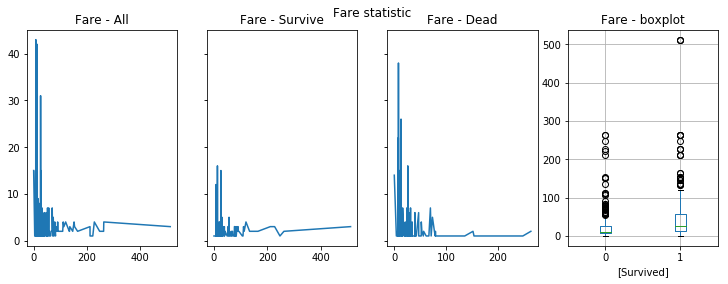

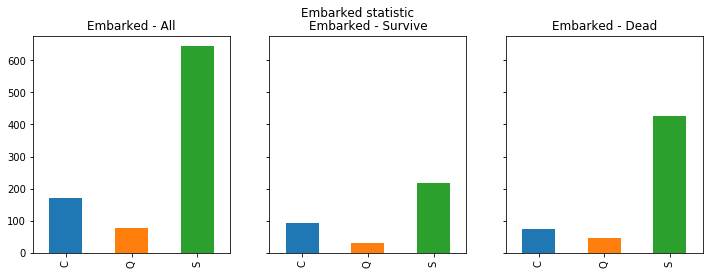

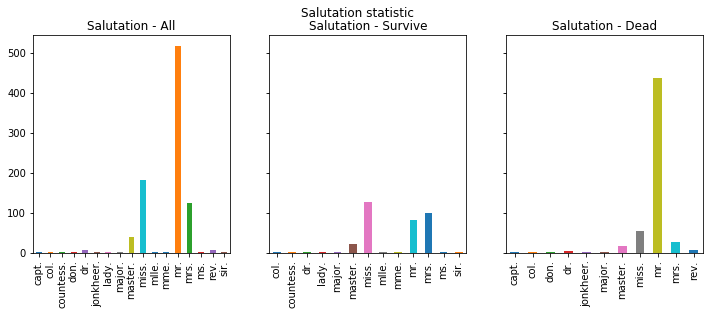

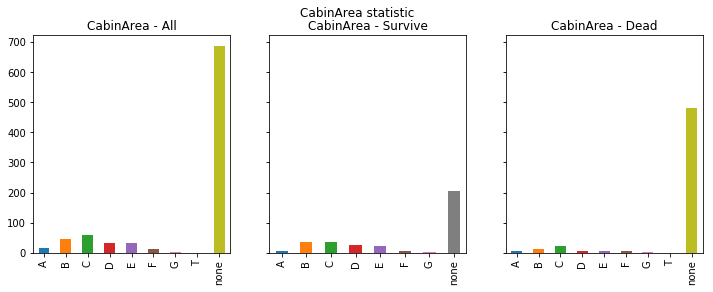

In [20]:
train_ds = get_train_ds(full_ds, train_raw)
train_ds["Survived"] = train_label

fig = plt.figure(figsize=(12, 4))
# get the class label of 0 and 1
train_ds['Survived'].value_counts().sort_index().plot.bar()

# plot in one single figure
fig = plt.figure(figsize=(12, 4))

# 131 means 1 row 3 columns and occupy the first?
ax1 = fig.add_subplot(131)
train_ds['Pclass'].value_counts().sort_index().plot.bar()
ax1.set_title('P class - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]['Pclass'].value_counts().sort_index().plot.bar()
ax2.set_title('P class - Survived')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]['Pclass'].value_counts().sort_index().plot.bar()
ax3.set_title('P calss - Dead')

plt.suptitle('P class statistics')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)
train_ds['Sex'].value_counts().sort_index().plot.bar()
ax1.set_title('Sex - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]['Sex'].value_counts().sort_index().plot.bar()
ax2.set_title('Sex - Survived')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]['Sex'].value_counts().sort_index().plot.bar()
ax3.set_title('Sex - Dead')

plt.suptitle('Sex statistics')

fig = plt.figure(figsize=(12,4))

# we wanna see more for Age
ax1 = fig.add_subplot(141)
train_ds["Age"].value_counts().sort_index().plot.line()
ax1.set_title('Age - All')

ax2 = fig.add_subplot(142, sharey=ax1)
train_ds[train_ds.Survived==1]["Age"].value_counts().sort_index().plot.line()
ax2.set_title('Age - Survive')

ax3 = fig.add_subplot(143, sharey=ax1)
train_ds[train_ds.Survived==0]["Age"].value_counts().sort_index().plot.line()
ax3.set_title('Age - Dead')

ax4 = fig.add_subplot(144)
train_ds[["Age","Survived"]].boxplot(by='Survived', ax=ax4)
ax4.set_title('Age - boxplot')

plt.suptitle('Age statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["SibSp"].value_counts().sort_index().plot.bar()
ax1.set_title('SibSp - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["SibSp"].value_counts().sort_index().plot.bar()
ax2.set_title('SibSp - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["SibSp"].value_counts().sort_index().plot.bar()
ax3.set_title('SibSp - Dead')

plt.suptitle('SibSp statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Parch"].value_counts().sort_index().plot.bar()
ax1.set_title('Parch - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Parch"].value_counts().sort_index().plot.bar()
ax2.set_title('Parch - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Parch"].value_counts().sort_index().plot.bar()
ax3.set_title('Parch - Dead')

plt.suptitle('Parch statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["FamilyMember"].value_counts().sort_index().plot.bar()
ax1.set_title('FamilyMember - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["FamilyMember"].value_counts().sort_index().plot.bar()
ax2.set_title('FamilyMember - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["FamilyMember"].value_counts().sort_index().plot.bar()
ax3.set_title('FamilyMember - Dead')

plt.suptitle('FamilyMember statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(141)
train_ds["Fare"].value_counts().sort_index().plot.line()
ax1.set_title('Fare - All')

ax2 = fig.add_subplot(142, sharey=ax1)
train_ds[train_ds.Survived==1]["Fare"].value_counts().sort_index().plot.line()
ax2.set_title('Fare - Survive')

ax3 = fig.add_subplot(143, sharey=ax1)
train_ds[train_ds.Survived==0]["Fare"].value_counts().sort_index().plot.line()
ax3.set_title('Fare - Dead')

ax4 = fig.add_subplot(144)
train_ds[["Fare","Survived"]].boxplot(by='Survived', ax=ax4)
ax4.set_title('Fare - boxplot')

plt.suptitle('Fare statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Embarked"].value_counts().sort_index().plot.bar()
ax1.set_title('Embarked - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Embarked"].value_counts().sort_index().plot.bar()
ax2.set_title('Embarked - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Embarked"].value_counts().sort_index().plot.bar()
ax3.set_title('Embarked - Dead')

plt.suptitle('Embarked statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["Salutation"].value_counts().sort_index().plot.bar()
ax1.set_title('Salutation - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["Salutation"].value_counts().sort_index().plot.bar()
ax2.set_title('Salutation - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["Salutation"].value_counts().sort_index().plot.bar()
ax3.set_title('Salutation - Dead')

plt.suptitle('Salutation statistic')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
train_ds["CabinArea"].value_counts().sort_index().plot.bar()
ax1.set_title('CabinArea - All')

ax2 = fig.add_subplot(132, sharey=ax1)
train_ds[train_ds.Survived==1]["CabinArea"].value_counts().sort_index().plot.bar()
ax2.set_title('CabinArea - Survive')

ax3 = fig.add_subplot(133, sharey=ax1)
train_ds[train_ds.Survived==0]["CabinArea"].value_counts().sort_index().plot.bar()
ax3.set_title('CabinArea - Dead')

plt.suptitle('CabinArea statistic')

             Survived  Pclass  Sex_enc  SibSp  Parch  FamilyMember  \
PassengerId                                                          
648                 1       1        1      0      0             0   
557                 1       1        0      1      0             1   
446                 1       1        1      0      2             2   
24                  1       1        1      0      0             0   
97                  0       1        1      0      0             0   
175                 0       1        1      0      0             0   
186                 0       1        1      0      0             0   
210                 1       1        1      0      0             0   
285                 0       1        1      0      0             0   
476                 0       1        1      0      0             0   

             Embarked_enc  Salutation_enc  CabinArea_enc        Age     Fare  
PassengerId                                                                   
6

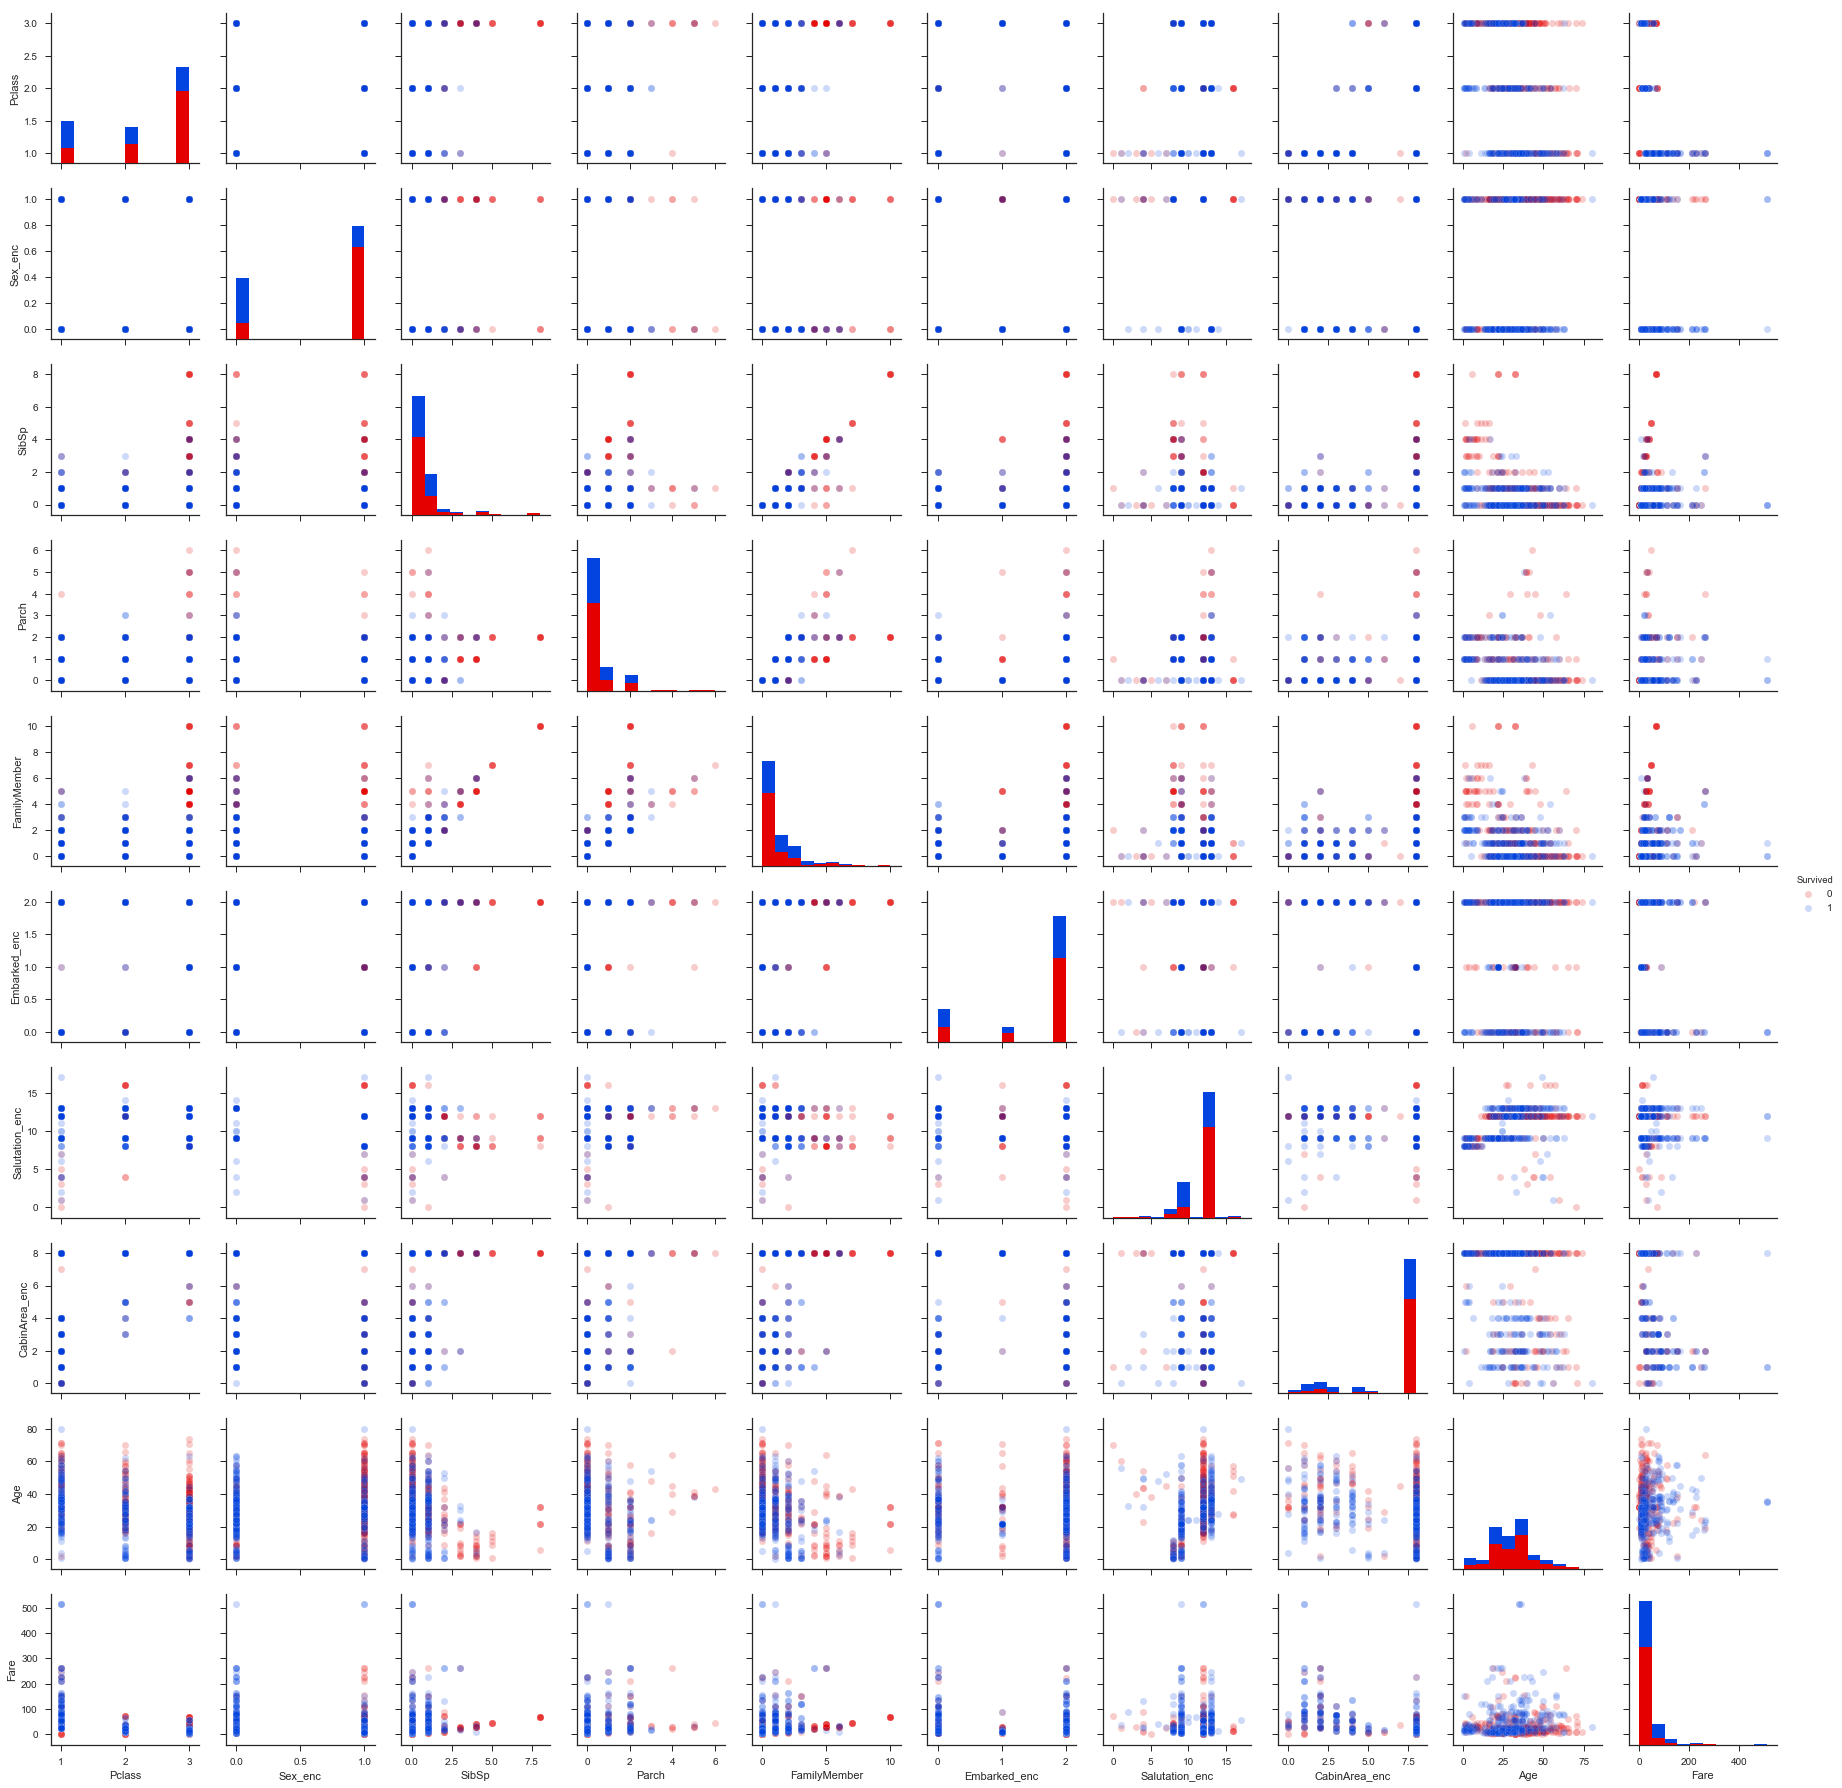

In [24]:
sns.set(style='ticks')
train_raw_pair = train_ds[["Survived", "Pclass", "Sex_enc", "SibSp", \
                        "Parch", "FamilyMember", "Embarked_enc", "Salutation_enc", \
                        "CabinArea_enc", "Age", "Fare"]]
print(train_raw_pair[:10])

print("\nNull value summary:")
print(train_raw_pair.isnull().sum())

# TODO
colors = ['red', 'blue']
sns.pairplot(train_raw_pair, hue='Survived',
            vars=["Pclass", "Sex_enc", "SibSp", "Parch", "FamilyMember", "Embarked_enc",\
                  "Salutation_enc", "CabinArea_enc", "Age", "Fare"], 
            plot_kws=dict(alpha=.2),
            palette=sns.xkcd_palette(colors))

### What we have learn?
1. Female is more likely to survive
2. Class 1 is more likely to survive
3. Travelling alone is deadly
4. Having cabin is more likely to survive

### Testing the quality of the data
Below we build a quick model and submit to Kaggle. The result is 79%

In [53]:
#create train and test dataset
train_dataset = get_train_ds(full_ds, train_raw)
test_dataset = get_train_ds(full_ds, test_raw)
print(train_dataset.shape)
print(test_dataset.shape)
train_dataset.sort_index(inplace=True)
test_dataset.sort_index(inplace=True)

#create train label
train_label = train_raw["Survived"]

''' Uncomment it if you want to save
try:
    set_filename = "../input/train_dataset.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(train_dataset, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)
    
try:
    set_filename = "../input/test_dataset.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(test_dataset, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)
    
try:
    set_filename = "../input/train_label.pickle"
    with open(set_filename, 'wb') as f:
        pickle.dump(train_label, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)
'''

(891, 17)
(418, 17)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


' Uncomment it if you want to save\ntry:\n    set_filename = "../input/train_dataset.pickle"\n    with open(set_filename, \'wb\') as f:\n        pickle.dump(train_dataset, f, pickle.HIGHEST_PROTOCOL)\nexcept Exception as e:\n    print(\'Unable to save data to\', set_filename, \':\', e)\n    \ntry:\n    set_filename = "../input/test_dataset.pickle"\n    with open(set_filename, \'wb\') as f:\n        pickle.dump(test_dataset, f, pickle.HIGHEST_PROTOCOL)\nexcept Exception as e:\n    print(\'Unable to save data to\', set_filename, \':\', e)\n    \ntry:\n    set_filename = "../input/train_label.pickle"\n    with open(set_filename, \'wb\') as f:\n        pickle.dump(train_label, f, pickle.HIGHEST_PROTOCOL)\nexcept Exception as e:\n    print(\'Unable to save data to\', set_filename, \':\', e)\n'

In [32]:
onehot_columns = ['Pclass', 'Embarked_enc', 'Salutation_enc', 'CabinArea_enc']
train_ds_onehot = train_ds[['Pclass', 'Sex_enc', 'SibSp', 'Parch', 'Fare', 'CabinArea_enc', \
                                'Embarked_enc', 'Salutation_enc', 'FamilyMember']]
# A dummy variable is a numerical variable used in regression analysis to represent subgroups 
# of the sample in your study.
# get_dummies(): Convert categorical variable into dummy/indicator variables
train_ds_onehot = pd.get_dummies(train_ds_onehot, sparse=True, columns=onehot_columns)
print(train_ds_onehot[0:10])

scalar = preprocessing.StandardScaler().fit(train_ds_onehot)
train_ds_onehot_scaled = scalar.transform(train_ds_onehot[0:10])

print(pd.DataFrame(train_ds_onehot_scaled))

             Sex_enc  SibSp  Parch     Fare  FamilyMember  Pclass_1  Pclass_2  \
PassengerId                                                                     
648                1      0      0  35.5000             0         1         0   
557                0      1      0  39.6000             1         1         0   
446                1      0      2  81.8583             2         1         0   
24                 1      0      0  35.5000             0         1         0   
97                 1      0      0  34.6542             0         1         0   
175                1      0      0  30.6958             0         1         0   
186                1      0      0  50.0000             0         1         0   
210                1      0      0  31.0000             0         1         0   
285                1      0      0  26.0000             0         1         0   
476                1      0      0  52.0000             0         1         0   

             Pclass_3  Emba

In [57]:
def transform_ds_to_input(dataset):
    onehot_columns = ['Pclass', 'Embarked_enc', 'Salutation_enc', 'CabinArea_enc']
    ds_onehot = dataset[['Pclass', 'Sex_enc', 'SibSp', 'Parch', 'Fare', 'CabinArea_enc', \
                                'Embarked_enc', 'Salutation_enc', 'FamilyMember']]
    ds_onehot = pd.get_dummies(ds_onehot, sparse=True, columns=onehot_columns)
    scalar = preprocessing.StandardScaler().fit(ds_onehot)
    ds_onehot_scaled = scalar.transform(ds_onehot)
    return ds_onehot_scaled

train_ds_onehot_scaled = transform_ds_to_input(train_dataset)
test_ds_onehot_scaled = transform_ds_to_input(test_dataset)

print(train_ds_onehot_scaled.shape)
print(test_ds_onehot_scaled.shape)

(891, 37)
(418, 28)


#### model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(train_ds_onehot_scaled, train_label, test_size=test_size)

# clf = RandomForestClassifier(n_estimators=5, max_features=3, max_depth=3, 
#                              min_samples_split=2, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make predictions for test data
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 81.72%


In [52]:
# for submission
clf = RandomForestClassifier()
clf.fit(train_ds_onehot_scaled, train_label)

y_pred = clf.predict(test_ds_onehot_scaled)
rf_predictions = [round(value) for value in y_pred]

PassengerId = test_ds_onehot_scaled['PassengerId']
test_Survived = pd.Series(rf_predictions, name='Survived')
Submission = pd.concat([PassengerId, test_Survived], axis=1)

ValueError: Number of features of the model must match the input. Model n_features is 37 and input n_features is 28 

### Visualizing the data using t-SNE

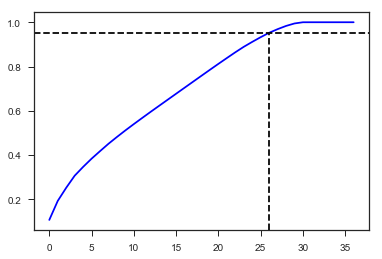

In [45]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(train_ds_onehot_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot([i for i in range(len(cumsum))], cumsum, 'b-')
plt.axhline(y=0.95, xmin=0, xmax=1, hold=None, c='k', linestyle='--')
plt.axvline(x=26, ymin=0, ymax=0.9, hold=None, c='k', linestyle='--')

In [48]:
import sklearn.manifold

pca = PCA(n_components=26)
train_ds_reduce = pca.fit_transform(train_ds_onehot_scaled)

tsne = sklearn.manifold.TSNE()
train_tsne = pd.DataFrame(tsne.fit_transform(train_ds_reduce))
train_tsne['Survived'] = train_label

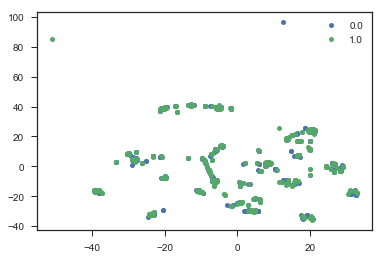

In [50]:
# TODO: what does this mean?
groups = train_tsne.groupby('Survived')

# plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[0], group[1], marker='o', linestyle=' ', ms=5, label=name)
ax.legend()

plt.show()

### Indexing: Single Row
The simplest way to access a row is to pass the row number to `.iloc` method.

In [13]:
 df.iloc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

The other approach is to pass a value from your dataframe's index to the `loc` method, of course the value here is just number. We can appoint the index row when read the data like `df = pd.read_csv('../input/parks.csv', index_col=['Park Code'])`

In [16]:
# df.loc['BCD']

### Indexing: Multiple Rows
If we need multiple rows, we can pass in multiple index values, note that this changes the order of the results!

In [17]:
# df.loc[['BADL', 'ARCH', 'ACAD']]

In [19]:
df.iloc[[2, 1, 0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S


Slicing the dataframe just as if it were a list also works.

In [20]:
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Indexing: Columns
We can access a subset of the columns in a dataframe by placing the list of columns in brackets like so:

In [22]:
df['Name'].head(3)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

We can access a single column as if it were an attribute of the dataframe, but only if the name has no spaces, uses only basic characters, and doesn't share a name with a dataframe method.

In [23]:
df.Name.head(3)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

We can convert the original names to elegant ones. By convention, the names should be converted to lower case. 

In [27]:
# df.columns
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
print(df.columns)

Index([u'passengerid', u'survived', u'pclass', u'name', u'sex', u'age',
       u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')


In [31]:
# indexing rows and columns, you can stack the commands we've already learned
df[['name', 'age']][:3]

,name,age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0


### Indexing: Scalar Values
As you may have noticed, everything we've tried so far returns a small dataframe or series. If you need a single value, singly pass in a single column and index value.

In [32]:
df.name[2]

'Heikkinen, Miss. Laina'

In [33]:
df.name[[2]]

2    Heikkinen, Miss. Laina
Name: name, dtype: object

### Selecting a subset of the data
The main method for subsetting data in Pandas is called **boolean indexing**. First, let's take a look at what Pandas does when we ask it to evaluate a boolean.

In [42]:
(df.age==8).head(3)

0    False
1    False
2    False
Name: age, dtype: bool

We get a series of the results of the boolean. Passing that series into a dataframe gives us the subset of the dataframe where the boolean evaluates to `True`

In [43]:
df[df.age == 8]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.250,NaN,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.750,NaN,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q


Some of the logical operators are defferent:
* ~ replaces `not`
* | replaces `or`
* & replaces `and`

If you have multiple arguments they'll need to be wrapped in parentheses. For examples:

In [48]:
df[(df.age > 50) | (df.fare < 5)].head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


You can also use more complicated expressions, including lambda

In [49]:
df[ df.name.str.split().apply(lambda x: len(x) == 3) ].head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Key companion methods: `isin` and `isnull`
These methods make it much easier and faster to perform some very common tasks. Suppose we wanna find the people embarked in `S` and `Q`:

In [50]:
df[ df.embarked.isin(['S', 'Q']) ].head(6)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
